In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('frog.jpg')

In [3]:
img

array([[[ 23, 182, 172],
        [ 22, 181, 171],
        [ 24, 182, 170],
        ...,
        [ 64, 102, 107],
        [ 64, 102, 107],
        [ 64, 102, 107]],

       [[ 23, 182, 172],
        [ 22, 181, 171],
        [ 24, 182, 170],
        ...,
        [ 64, 102, 107],
        [ 64, 102, 107],
        [ 64, 102, 107]],

       [[ 23, 182, 172],
        [ 22, 181, 171],
        [ 24, 182, 170],
        ...,
        [ 63, 101, 106],
        [ 63, 101, 106],
        [ 63, 101, 106]],

       ...,

       [[ 29,  87,  29],
        [ 29,  87,  29],
        [ 28,  86,  28],
        ...,
        [  2,  50,  24],
        [  1,  49,  23],
        [  1,  49,  25]],

       [[ 29,  87,  29],
        [ 29,  87,  29],
        [ 29,  87,  29],
        ...,
        [  7,  56,  24],
        [  5,  54,  22],
        [  3,  52,  20]],

       [[ 30,  88,  30],
        [ 30,  88,  30],
        [ 29,  87,  29],
        ...,
        [ 11,  67,  26],
        [  9,  65,  24],
        [  6,  61,  22]]

In [4]:
type(img)

numpy.ndarray

In [5]:
img_size = img.shape
img_size

(183, 275, 3)

In [6]:
#We need to convert this 3D array of data to a 2D array i.e. (H x W x C) to ((H*W) x C). We dissolve the height and width dimensions to a single one.
#Now we will have H*W number of points.
#Let's alse normalize the image.
x = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [7]:
x

array([[ 23, 182, 172],
       [ 22, 181, 171],
       [ 24, 182, 170],
       ...,
       [ 11,  67,  26],
       [  9,  65,  24],
       [  6,  61,  22]], dtype=uint8)

In [8]:
#Let's try to get the best value of k using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\Yogesh Singh\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Yogesh Singh\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Yogesh Singh\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Yogesh Singh\.conda\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\

In [21]:
sse = []
n_clusters = range(5, 50, 5)
for k in n_clusters:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Distance')

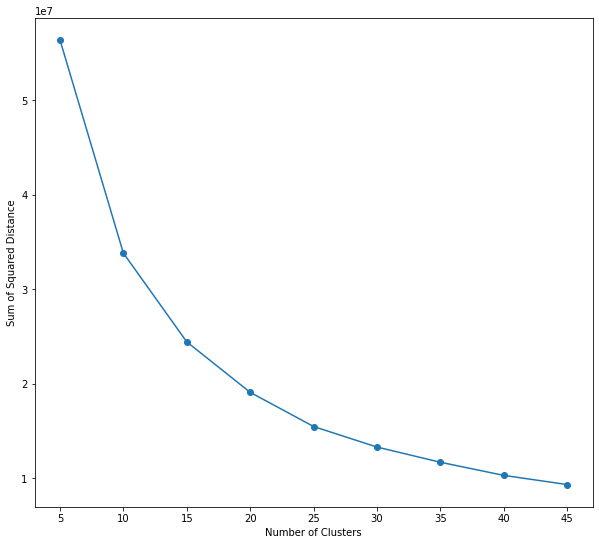

In [22]:
plt.figure(figsize = (10, 9))
plt.plot(n_clusters, sse, '-o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distance")

In [23]:
km = KMeans(n_clusters = 100)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
#Centroids
len(km.cluster_centers_)

100

In [25]:
#Labels correspond to each point assigned to which cluster.
len(km.labels_)

50325

In [26]:
c1 = km.cluster_centers_[km.labels_]
compressed = np.clip(c1.astype('uint8'), 0, 255)

In [27]:
compressed = compressed.reshape(183, 275, 3)

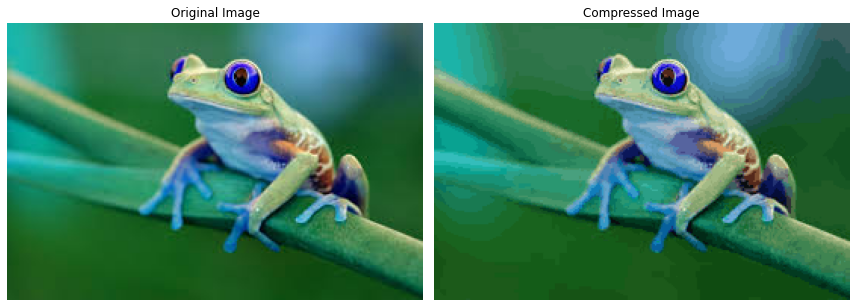

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(compressed)
ax[1].set_title('Compressed Image')

for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();